In [1]:
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1662
┌ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]
└ @ Base loading.jl:1662


In [2]:
# Set work data Type
T = BigFloat
setprecision(512)
;

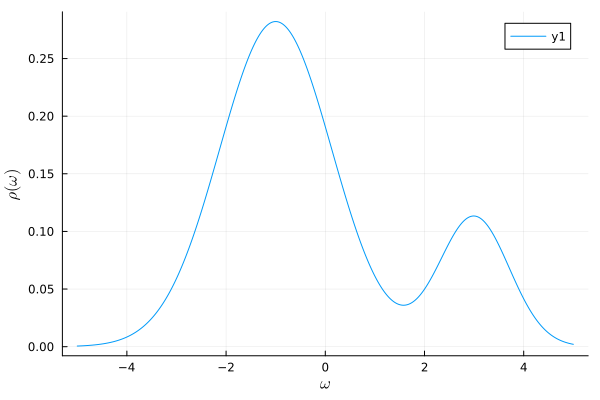

In [3]:
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)

#on-centered gaussian 23s
#rho(omega) = gaussian(omega, 0.0, 0.3)  

#two peak model 4403s
rho(omega) = 0.8*gaussian(omega, -1.0, 1.6) + 0.2*gaussian(omega, 3, 1)

#three peak model 1255s
#rho(omega) = 0.4*gaussian(omega, 1.0, 0.5) + 
#    0.4*gaussian(omega, 3.0, 0.8) + 0.2*gaussian(omega, -2.0, 1.0) 

omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
beta = 100.
wmax = 100.
basis = FiniteTempBasisSet(beta, wmax, 1e-15)

rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
gl = - basis.basis_f.s .* rhol
gw = evaluate(basis.smpl_wn_f, gl)
;

In [5]:
hnw = length(basis.smpl_wn_f.sampling_points)÷2
sum = -dot(basis.basis_f.u(SparseIR.β(basis)), gl) - dot(basis.basis_f.u(0), gl)

0.9999999999999998

In [6]:
input_smpl = Array{Complex{T}}(undef, hnw) 
input_gw   = Array{Complex{T}}(undef, hnw) 
;

In [7]:
for i in 1:hnw
    input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], SparseIR.β(basis))
    input_gw[i]  = gw[hnw+i]
end

In [8]:
N_real    = 1000
omega_max = 10.0
eta       = 0.001
H_max     = 50
#ab_coeff  = zeros(ComplexF64, 2*H_max) 
lambda    = 1e-5
iter_tol  = 1000
#N_imag    =  Nevanlinna.calc_opt_N_imag(hnw, test_smpl, test_gw)
;

In [25]:
#@time sol = Nevanlinna.NevanlinnaSolver(hnw, input_smpl, input_gw, N_real, omega_max, eta, sum, H_max, iter_tol, lambda, verbose=true)
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     1.394069e-02     1.354674e-01
 * time: 0.0004401206970214844
     1     1.206891e-02     8.575569e-02
 * time: 0.33903002738952637
     2     4.456045e-03     1.189624e-01
 * time: 0.914553165435791
     3     3.628310e-03     5.662165e-03
 * time: 1.2223801612854004
     4     3.610816e-03     5.512176e-04
 * time: 1.6199440956115723
     5     3.610754e-03     1.813940e-04
 * time: 2.092863082885742
     6     3.610752e-03     3.976486e-05
 * time: 2.4674370288848877
     7     3.610752e-03     7.187992e-06
 * time: 2.7511990070343018
     8     3.610752e-03     1.244625e-06
 * time: 3.1923880577087402
     9     3.610752e-03     2.876487e-07
 * time: 3.6425600051879883
    10     3.610752e-03     5.216388e-08
 * time: 3.9476749897003174
    11     3.610752e-03     1.158958e-08
 * time: 4.228391170501709
    12     3.610752e-03     2.960944e-09
 * time: 4.661518096923828
max_theta=0.07656815651655833991639

In [ ]:
@time Nevanlinna.solve!(sol)

H=1
Iter     Function value   Gradient norm 
     0     3.610752e-03     2.960944e-09
 * time: 0.0004451274871826172
max_theta=0.0765681565165583399163930304305576260592818821686446929262905325114350565072254992822312827341813367254812245992568556725855747469562597673783006660423312559
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     3.610752e-03     4.607507e-02
 * time: 0.0002529621124267578
     1     3.445315e-03     5.244312e-02
 * time: 0.43405914306640625
     2     2.521631e-03     6.530742e-02
 * time: 0.7466411590576172
     3     1.387232e-03     5.204160e-02
 * time: 1.073348045349121
     4     1.193484e-03     1.374202e-02
 * time: 1.4105169773101807
     5     1.172533e-03     5.654424e-03
 * time: 2.1185600757598877
     6     1.161579e-03     8.430653e-03
 * time: 2.71830415725708
     7     1.115227e-03     1.339517e-02
 * time: 3.4656460285186768
     8     1.086357e-03     8.370213e-03
 * time: 3.9556729793548584
     9     1.0

    27     4.568389e-05     1.858098e-03
 * time: 18.703244924545288
    28     4.503867e-05     2.692546e-03
 * time: 19.327826976776123
    29     4.421328e-05     2.616530e-03
 * time: 19.964700937271118
    30     4.335563e-05     7.184742e-04
 * time: 20.68831491470337
    31     4.326758e-05     2.115857e-04
 * time: 21.272715091705322
    32     4.326472e-05     3.117711e-05
 * time: 21.651714086532593
    33     4.326457e-05     1.159340e-05
 * time: 22.305914878845215
    34     4.326455e-05     1.608980e-06
 * time: 23.0969979763031
    35     4.326455e-05     9.471757e-07
 * time: 23.58720588684082
    36     4.326455e-05     1.138607e-07
 * time: 24.097552061080933
    37     4.326455e-05     3.291541e-08
 * time: 24.70045495033264
    38     4.326455e-05     1.199533e-08
 * time: 25.30775809288025
    39     4.326455e-05     4.006537e-09
 * time: 25.761970043182373
max_theta=0.2334692921552240914775633478718364742983609297743247332092122317200731223407412493950599534940341

    45     7.856621e-06     6.488197e-05
 * time: 32.97579002380371
    46     7.855510e-06     1.280155e-04
 * time: 33.847169160842896
    47     7.853767e-06     1.804031e-04
 * time: 34.67894697189331
    48     7.849628e-06     2.902871e-04
 * time: 35.42037320137024


In [ ]:
wo_sol = Nevanlinna.NevanlinnaSolver(hnw, input_smpl, input_gw, N_real, omega_max, eta, sum, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

In [ ]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [ ]:
plot(xlim = [-6,6],
    legend = :topright,
    ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
#plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak.svg")